In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
x_train_path = "data/dataset/x_train.csv"
x_train = pd.read_csv(x_train_path)
print (x_train.shape)

(328135, 322)


/Users/henry/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/henry/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/henry/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


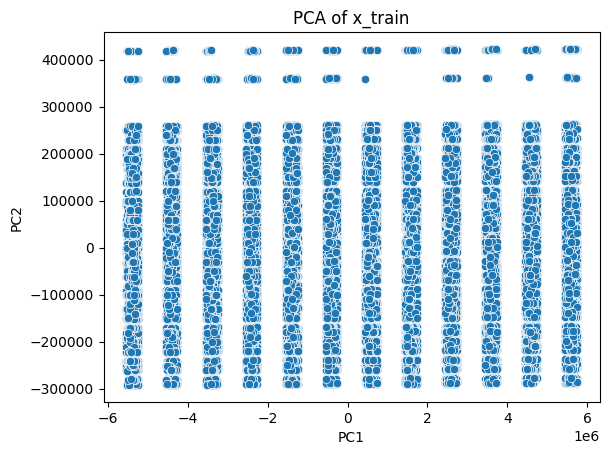

In [3]:
from sklearn.decomposition import PCA

# Drop non-numeric columns if any
# x_train_numeric = x_train.select_dtypes(include=[np.number])
# x_train_numeric = x_train

# x_train.columns = x_train.iloc[0]  # Set the first row as the header
# x_train = x_train[1:]  # Remove the first row now that it's set as header
x_train = x_train.dropna(axis=1)

# print(x_train)


# Run PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_train)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot using seaborn
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of x_train')
plt.show()

/Users/henry/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/henry/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/henry/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/henry/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in 

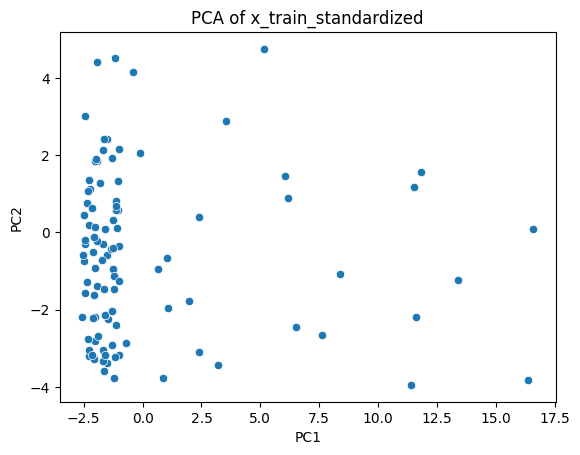

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)

# Converting the standardized data back into a DataFrame
x_train_standardized = pd.DataFrame(x_train_standardized, columns=x_train.columns)

# Run PCA
pca = PCA(n_components=2)
principal_components_standardized = pca.fit_transform(x_train_standardized)

x_train_standardized_with_PCs = x_train_standardized.copy()
x_train_standardized_with_PCs['PC1'] = principal_components_standardized[:, 0]
x_train_standardized_with_PCs['PC2'] = principal_components_standardized[:, 1]

x_train_standardized_with_PCs = x_train_standardized_with_PCs.head(100)

# Plot using seaborn
sns.scatterplot(x='PC1', y='PC2', data=x_train_standardized_with_PCs)

# sns.scatterplot(x='PC1', y='PC2', hue='_STATE', data=x_train_standardized, palette="viridis", legend='full', alpha=0.7)
plt.title('PCA of x_train_standardized')
plt.show()

In [18]:
# Get PCA loadings (contributions of each feature to PC1 and PC2)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=x_train_standardized.columns)

# Display the loadings sorted by the absolute value for PC1
loadings['Absolute_PC1'] = abs(loadings['PC1'])
loadings_sorted = loadings.sort_values('Absolute_PC1', ascending=False)

print("Top features contributing to PC1:")
print(loadings_sorted[['PC1', 'Absolute_PC1']])

# Display the loadings sorted by the absolute value for PC1
loadings['Absolute_PC2'] = abs(loadings['PC2'])
loadings_sorted = loadings.sort_values('Absolute_PC2', ascending=False)

print("Top features contributing to PC1:")
print(loadings_sorted[['PC2', 'Absolute_PC2']])


Top features contributing to PC1:
               PC1  Absolute_PC1
PAMISS1_  0.213906      0.213906
_MISVEGN  0.212437      0.212437
_TOTINDA  0.209798      0.209798
_MISFRTN  0.205231      0.205231
_RFSEAT2  0.204430      0.204430
...            ...           ...
_LTASTH1  0.000561      0.000561
IDATE     0.000502      0.000502
_VEG23   -0.000420      0.000420
Id        0.000070      0.000070
IMONTH   -0.000004      0.000004

[83 rows x 2 columns]
Top features contributing to PC1:
               PC2  Absolute_PC2
_AGEG5YR -0.364095      0.364095
_AGE80   -0.363332      0.363332
_AGE_G   -0.358222      0.358222
_HCVU651 -0.310731      0.310731
_AGE65YR -0.309642      0.309642
...            ...           ...
_CASTHM1  0.002361      0.002361
DROCDY3_ -0.001607      0.001607
_FRT16    0.000953      0.000953
Id        0.000554      0.000554
_VEG23    0.000528      0.000528

[83 rows x 2 columns]
